# Reviews Solicitation
---

## Bayesian Inference
- Bayesians go from prior to posterior is to use the laws of conditional probability,
sometimes called in this context Bayes rule or Bayes theorem
- Suppose we have a PDF $g$ for the prior distribution of the parameter $\theta$,
and suppose we obtain data $x$ whose conditional PDF given $\theta$ is $f$
- Then the joint distribution of data and parameters is conditional times marginal
$$f( x | \theta) g(\theta)$$
- May look strange because most of your training on considers the frequentist paradigm
- Here both $x$ and $\theta$ are random variables

- The correct posterior distribution, according to the Bayesian paradigm, is the conditional distribution of $\theta$ given $x$, which is joint divided by marginal
$$h (\theta | x) = \frac{f( x | \theta) g(\theta)}{\int f( x | \theta) g(\theta) d \theta}$$
- Often we do not need to do the integral if we recognize that
$$\theta \mapsto f( x | \theta) g(\theta)$$
is, except for constants, the PDF of a brand name distribution, then that distribution must be the posterior

---
## Binomial Data, Beta Prior

Suppose the prior distribution for $p$ is Beta($\alpha_1, \alpha_2$) and the conditional distribution of $x$ given $p$ is Bin($n$, $p$). Then
$$f(x|p) = {n \choose p} p^x (1-p)^{n-x}$$
and 
$$g(p) = \frac{\Gamma(\alpha_1 + \alpha_2)}{\Gamma(\alpha_1)\Gamma(\alpha_2)} p^{\alpha_1 -1} (1-p)^{\alpha_2 - 1}.$$
Then
$$f(x|p) g(p) = {n \choose p} \frac{\Gamma(\alpha_1 + \alpha_2)}{\Gamma(\alpha_1)\Gamma(\alpha_2)} p^{x + \alpha_1 -1} (1-p)^{n - x + \alpha_2 - 1}$$
and this, considered as a function of $p$ for fixed $x$ is, except for constants, the PDF of a Beta($x + \alpha_1, n - x + \alpha_2$) distribution. So that is the posterior.

Since we know the mean of a beta distribution, we can see the posterior mean is
$$E(p|x) = \frac{x + \alpha_1}{x + \alpha_1 + \alpha_2}$$

## Toy Example

Suppose we're interested in two cell phone traits, e.g. **cost** and **screen**.  For now, we consider only two possible ratings, e.g. **like** or **dislike**.  Suppose $p_c$ is the probability of liking the cost and $p_s$ is the probability of liking the screen.  Then we can Bayesian inference for $p_c$ and $p_s$.

Such inference requires choosing a prior (whose impact will decrease as we observe more data).  It's common to choose a Uniform prior.

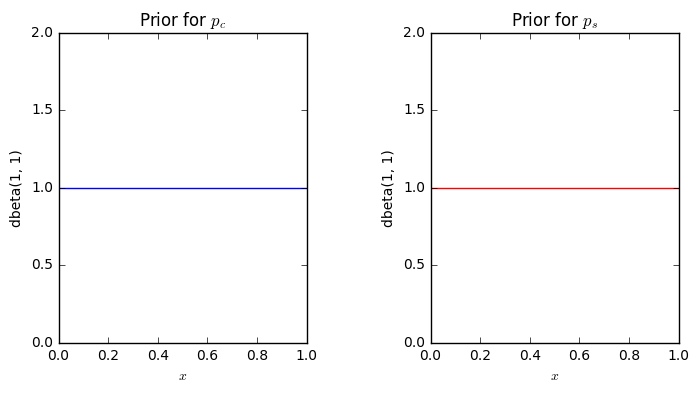

In [94]:
#%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
from scipy.stats import beta

fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(wspace=0.5)

x = np.linspace(0, 1, 1002)[1:-1]
beta_prior = beta(1, 1)

ax = fig.add_subplot(1, 2, 1, xlabel=r'$x$', ylabel='dbeta(1, 1)',
                     xlim=(0, 1), ylim=(0, 2), title=r'Prior for $p_c$')
ax.plot(x, beta_prior.pdf(x), c='blue', label=r'$\alpha=1,\ \beta=1$')

ax = fig.add_subplot(1, 2, 2, xlabel=r'$x$', ylabel='dbeta(1, 1)',
                     xlim=(0, 1), ylim=(0, 2), title=r'Prior for $p_s$')
ax.plot(x, beta_prior.pdf(x), c='red', label=r'$\alpha=1,\ \beta=1$')

plt.show()

Now suppose we have 7 likes and 8 dislikes for cost and 3 likes and 1 dislike for screen and 7 likes.  Then, the posterior
of $p_c | x$ is a Beta($8, 9$) distribution and $p_s | x$ is a Beta($4, 2$) distribution.  Graphically, we have the following.

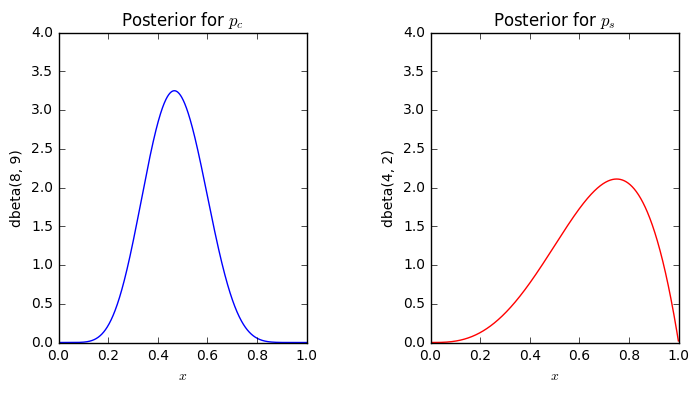

In [95]:
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(wspace=0.5)

# Cost - Beta(8, 9)
ax = fig.add_subplot(1, 2, 1, xlabel=r'$x$', ylabel='dbeta(8, 9)',
                     xlim=(0, 1), ylim=(0, 4), title=r'Posterior for $p_c$')
ax.plot(x, beta(8, 9).pdf(x), c='blue', label=r'$\alpha=1,\ \beta=1$')

# Cost - Beta(4, 2)
ax = fig.add_subplot(1, 2, 2, xlabel=r'$x$', ylabel='dbeta(4, 2)',
                     xlim=(0, 1), ylim=(0, 4), title=r'Posterior for $p_s$')
ax.plot(x, beta(4, 2).pdf(x), c='red', label=r'$\alpha=1,\ \beta=1$')

plt.show()

Since the variance (or spread) for screen is larger, we may want to obtain more observations related to screen.

---
## Multinomial Data - Multi-level Ratings

Suppose that users can rate $1, 2, \ldots,$ or $k$ stars for each product's attribute, i.e. $k$ categories. Notate $(x_1, x_2, \ldots, x_k)$ as above categories' counts, $n = \Sigma {x_i}$. Our main interest is vector $p = (p_1, p_2, \ldots, p_k)$ that represents the probability (degree of belief) that users rate $1, 2, \ldots, k$ stars respectively. 

Suppose the prior distribution for $p = (p_1, p_2, \ldots, p_k)$ is Dirichlet of order $k \geq 2$ with parameters $\alpha_1, \alpha_2, \ldots, \alpha_k > 0$:
$$g(p) = \frac{1}{B(\alpha)} \prod_{i=1}^{k} p_i^{\alpha_i - 1}$$
and the likelihood $f(x | p)$ is multinomial distribution:
$$f(x|p) = \frac{n!}{x_1! \ldots x_k!} \prod_{i=1}^{k} p_i^{x_i}$$

Therefore we have the posterior:
$$h(p|x) \varpropto f(x|p)g(p) = \frac{n!}{x_1! \ldots x_k!} \times \frac{1}{B(\alpha)} \times \prod_{x=1}^{k} p_i^{x_i + \alpha_i - 1}$$
This is also a Dirichlet distribution with parameter $(x_1 + \alpha_1, \ldots, x_k + \alpha_k)$ that have the mean:
$$E[p_i|x] = \frac{x_i + \alpha_i}{\Sigma_{i=1}^{k} {(x_i + \alpha_i)} }$$
and variance:
$$Var[p_i|x] = \frac{\alpha_i(\alpha_0 - \alpha_i)}{\alpha_0^2(\alpha_0 + 1)}$$
where $\alpha_0 = \Sigma_{i=1}^{k} \alpha_i$, and co-variance:
$$Cov[p_i, p_j|x] = \frac{-\alpha_i \alpha_j}{\alpha_0^2(\alpha^0 + 1)}$$

For our purpose, we can consider the attribute that have small $\Sigma_i Var[p^i|x]$ to be stable. In another word, asking incoming users about an attribute that maximize $\Sigma_i Var[p^i|x]$.

### Toy example
Consider 2 cell phone traits again: **cost** and **screen**. This time, users can rate with $1, 2$ or $3$ stars. Suppose $p_c^1, p_c^2$ and $p_c^3$ are the probabilities of rating the cost with $1, 2$ and $3$ stars, $p_c^1 + p_c^2 + p_c^3 = 1$. Similarly, we have $p_s^1, p_s^2$ and $p_s^3$ for screen. Again, we do Bayesian inference for $p_c^i$ and $p_s^i$ with uniform prior, or Dirichlet distribution with all $\alpha_i$ to be the same $\alpha_i = \alpha = 1$.

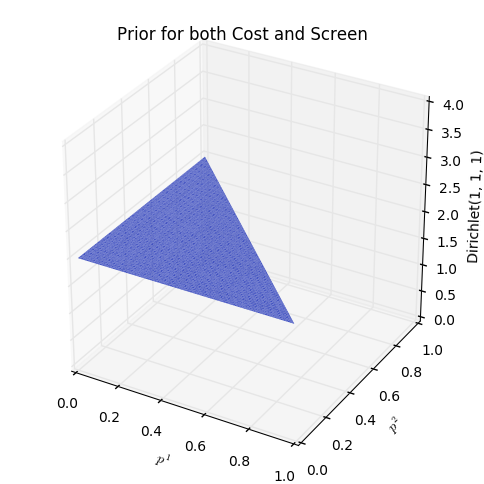

In [96]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import scipy.stats as stats


def dirichlet_coord(a1, a2, a3):
    x, y = np.mgrid[0.01:1:0.01, 0.01:1:0.01]
    x = x.flatten()
    y = y.flatten()
    xy = x + y
    x = x[xy < 1]
    y = y[xy < 1]
    xy_remain = 1 - (x + y)
    z = [stats.dirichlet.pdf([x[i], y[i], xy_remain[i]], [a1, a2, a3]) for i in range(len(x))]
    z = np.array(z)
    return (x, y, z)

fig = plt.figure(figsize=(6, 6))
ax = fig.gca(projection='3d', xlabel=r'$p^1$', ylabel=r'$p^2$', zlabel='Dirichlet(1, 1, 1)',
             zlim=(0, 4), title='Prior for both Cost and Screen', zmargin=1)
x, y, z = dirichlet_coord(1, 1, 1)
ax.plot_trisurf(x, y, z, cmap=cm.coolwarm, linewidth=0.0, antialiased=True)
plt.show()

We suppose that we have 5, 9, 20 ratings of 1, 2, 3 stars respectively for cost and 2, 4, 8 ratings of 1, 2, 3 stars respectively for screen. Then the posterior of the cost $h(p_c|x)$ and screen $h(p_s|x)$ are respectively Dirichlet(6, 11, 51) and Dirichlet(3, 5, 9). Consider variance for the cost:
$$\alpha_0 = \Sigma \alpha_i = 6 + 10 + 21 = 37$$
$$Var[p_c^1|x] = \frac{\alpha_1(\alpha_0 - \alpha_1)}{\alpha_0^2(\alpha_0 + 1)}=\frac{6\times 31}{37^2 \times 38} = 0.004$$
$$Var[p_c^2|x] = \frac{\alpha_2(\alpha_0 - \alpha_2)}{\alpha_0^2(\alpha_0 + 1)}=\frac{10\times 27}{37^2 \times 38} = 0.005$$
$$Var[p_c^3|x] = \frac{\alpha_3(\alpha_0 - \alpha_3)}{\alpha_0^2(\alpha_0 + 1)}=\frac{21\times 16}{37^2 \times 38} = 0.006$$

Similarly for the screen:
$$\alpha_0 = \Sigma \alpha_i = 3 + 5 + 9 = 17$$
$$Var[p_s^1|x] = \frac{\alpha_1(\alpha_0 - \alpha_1)}{\alpha_0^2(\alpha_0 + 1)}=\frac{3\times 14}{17^2 \times 18} = 0.008$$
$$Var[p_s^2|x] = \frac{\alpha_2(\alpha_0 - \alpha_2)}{\alpha_0^2(\alpha_0 + 1)}=\frac{12\times 5}{17^2 \times 18} = 0.012$$
$$Var[p_s^3|x] = \frac{\alpha_3(\alpha_0 - \alpha_3)}{\alpha_0^2(\alpha_0 + 1)}=\frac{9\times 8}{17^2 \times 18} = 0.014$$

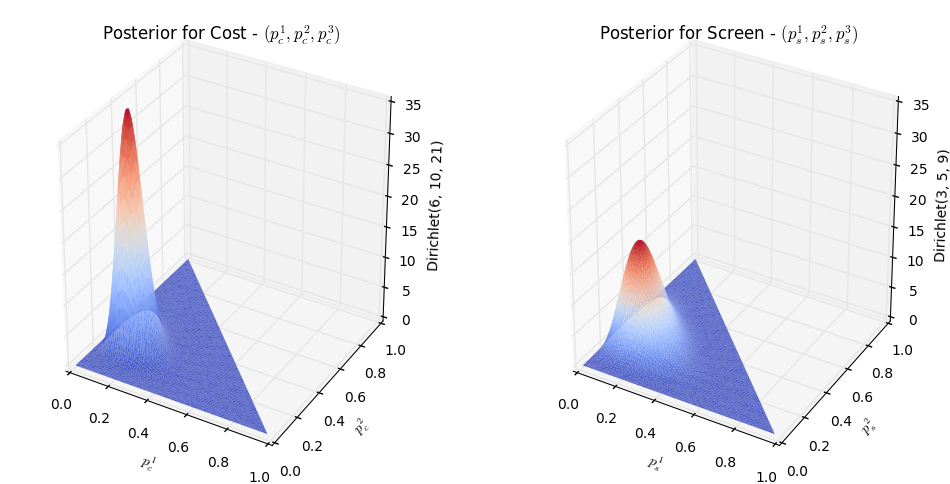

In [97]:
fig = plt.figure(figsize=(12, 6), frameon=True)

# Cost
ax = fig.add_subplot(1, 2, 1, projection='3d',
                     xlabel=r'$p_c^1$', ylabel=r'$p_c^2$', zlabel='Dirichlet(6, 10, 21)', zlim=(0, 35),
                     title=r'Posterior for Cost - $(p_c^1, p_c^2, p_c^3)$')
x, y, z = dirichlet_coord(6, 10, 21)
ax.plot_trisurf(x, y, z, cmap=cm.coolwarm, linewidth=0.0, antialiased=True)

# Screen
ax = fig.add_subplot(1, 2, 2, projection='3d',
                     xlabel=r'$p_s^1$', ylabel=r'$p_s^2$', zlabel='Dirichlet(3, 5, 9)', zlim=(0, 35),
                     title='Posterior for Screen - $(p_s^1, p_s^2, p_s^3)$')
x, y, z = dirichlet_coord(3, 5, 9)

ax.plot_trisurf(x, y, z, cmap=cm.coolwarm, linewidth=0.0, antialiased=True)
plt.show()

Note that $p_c^3 = 1 - p_c^1 - p_c^2$ and $p_s^3 = 1 - p_s^1 - p_s^2$. Taking into account that the variance for screen is larger, we can ask users more questions about it.

---
## Open for discussion
So far, we have a nice framework for estimating the certainty of $p_c^1, p_c^2, p_c^3$ of an attribute. The simplest criterion for choosing an attribute to ask users is the variance of $\Sigma_i p_c^i$. However, there are other aspects worth considering:
* Some attributes are more important. On the other side, the important attributes are normalled got many ratings already.
* Attributes are correlated. So, ratings of an attribute somewhat imply about its correlated attributes.

---
## References

A couple of resources are as follows.
1. [Dirichlet Distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution)
2. [Bayesian Inference for Categorical Data Analysis](http://www.stat.ufl.edu/~aa/cda2/bayes.pdf)